## Lecture Notes

| **Property** | **Strict Stationarity (Strong Stationarity)** | **Wide-Sense Stationarity (WSS / Weak Stationarity)** |
|---------------|-----------------------------------------------|--------------------------------------------------------|
| **Formal Definition** | A process $\{X(t)\}$ is *strictly stationary* if all its finite-dimensional distributions are invariant under time shifts:<br><br>$(X_{t_1}, X_{t_2}, \dots, X_{t_k}) \stackrel{d}{=} (X_{t_1+\tau}, X_{t_2+\tau}, \dots, X_{t_k+\tau})$<br>for all $t_1, \dots, t_k, \tau \in \mathbb{R}$ and $k \in \mathbb{N}$. | A process $\{X(t)\}$ is *wide-sense stationary* if:<br><br>1. $\mathbb{E}[X(t)] = \mu$, constant for all $t$<br>2. $C_X(t_1, t_2) = \mathbb{E}[(X(t_1)-\mu)(X(t_2)-\mu)] = C_X(t_1 - t_2)$ |
| **Dependence on Time** | No change in *any* statistical property under time shift | Only the **mean** and **autocovariance** are time-invariant |
| **Moments Involved** | All moments (of all orders) | Only first and second moments |
| **Implication** | $\Rightarrow$ Always implies WSS (if second moment exists) | $\not\Rightarrow$ Does *not* imply strict stationarity |
| **Example** | White noise with any fixed distribution | Gaussian process with constant mean and autocovariance depending only on lag |


## Excercises

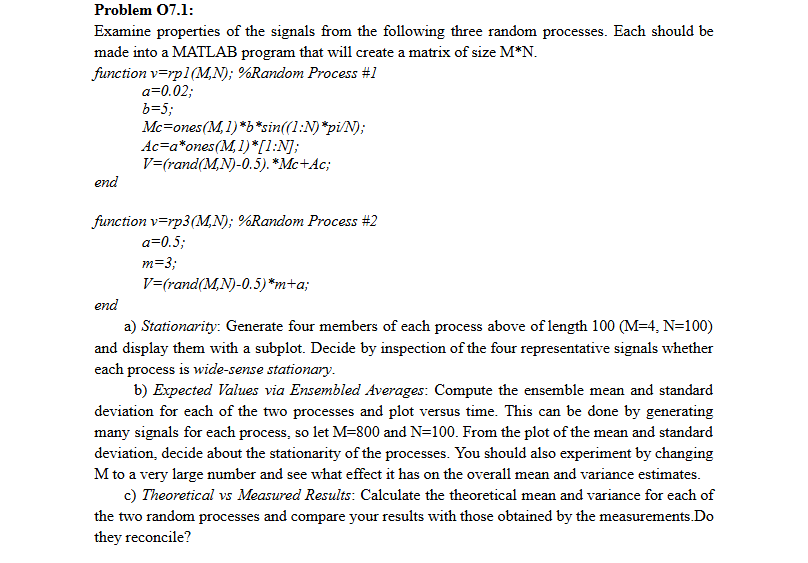

In [44]:
import numpy as np

# Here GenAI is used to convert from MatLab to Python since I don't understand the syntax

# Random Process #1
def rp1(M, N):
    """
    MATLAB function v=rp1(M,N) converted to Python.
    Calculates a random process matrix V of size (M, N).
    """
    a = 0.02
    b = 5

    # Mc = ones(M,1) * b * sin((1:N) * pi/N);
    # In MATLAB, 'ones(M,1)' is a column vector of ones, (1:N) is a row vector.
    # The outer product (column vector * row vector) or broadcasting achieves the desired result.
    # np.arange(1, N+1) creates the sequence [1, 2, ..., N]
    # np.sin(...) computes sin for each element.
    # The term b * np.sin((np.arange(1, N + 1) * np.pi) / N) is a 1xN row vector.
    # The multiplication with np.ones((M, 1)) * (the row vector) broadcasts it to an MxN matrix.
    # A more direct NumPy way is to compute the row vector and let broadcasting handle the rest.
    row_vector_sin = b * np.sin((np.arange(1, N + 1) * np.pi) / N)
    Mc = np.ones((M, 1)) * row_vector_sin # Broadcast to M rows

    # Ac = a * ones(M,1) * [1:N];
    # This is similar to Mc, creating an MxN matrix where row_i = a * [1, 2, ..., N].
    row_vector_range = a * np.arange(1, N + 1)
    Ac = np.ones((M, 1)) * row_vector_range # Broadcast to M rows

    # V = (rand(M,N) - 0.5) .* Mc + Ac;
    # rand(M,N) is equivalent to np.random.rand(M, N)
    # The .* (element-wise multiplication) is the default * in numpy when both are arrays.
    V = (np.random.rand(M, N) - 0.5) * Mc + Ac

    return V

def rp1_theoretical_stats(N):

    a = 0.02
    b = 5
    
    mean = a * np.arange(1, N + 1)
    
    var = 1/12 * b**2 * np.sin((np.arange(1, N + 1) * np.pi) / N)**2
    
    return mean, var

# Random Process #3
def rp3(M, N):
    """
    MATLAB function v=rp3(M,N) converted to Python.
    Calculates a random process matrix V of size (M, N).
    """
    a = 0.5
    m = 3

    # V = (rand(M,N) - 0.5) * m + a;
    # rand(M,N) is equivalent to np.random.rand(M, N)
    V = (np.random.rand(M, N) - 0.5) * m + a

    return V

def rp3_theoretical_stats(N):

    a = 0.5
    m = 3
    
    mean = np.ones(N) * a
    
    var = np.ones(N) * 1/12 * m**2
    
    return mean, var

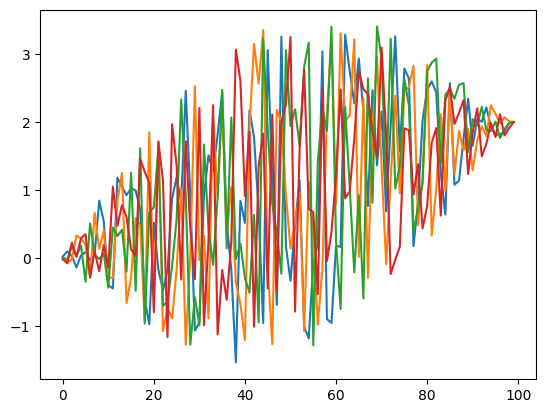

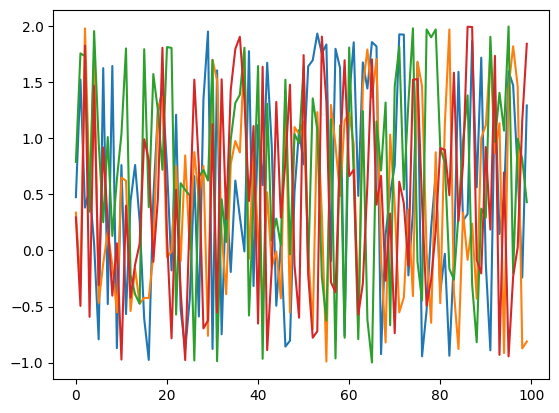

In [42]:
import matplotlib.pyplot as plt

# a.1)

# Generate and plot data
rp1_data = rp1(M=4, N=100)

plt.figure()
plt.plot(rp1_data.T)

# The process is not WSS, since there is a drift "Ac" which changes the mean over time. Also, the variance is not independent of time due to the scaling.

# a.2)

# Generate and plot data
rp3_data = rp3(M=4, N=100)

plt.figure()
plt.plot(rp3_data.T)

# Here the process is WSS since we have independent uniform samples, which are scaled by y=a*m+a independent of time

### Theoretical values for RP1 and RP3

#### RP1

We define $V=A 5 sin(\frac{\pi t}{N})+0.02t$ where $A \sim U(-0.5, 5)$

$\mathbf{E}[A]=0$ hence $\mathbf{E}[V]=0.02t$

$Var(A)=frac{(0.5+0.5)^2}{12}=\frac{1}{12}$ hence $Var(V)=\frac{1}{12}5^2sin^2(\frac{\pi t}{N})$

#### RP3

We define $V=3A+0.5$ where $A \sim U(-0.5, 5)$

$\mathbf{E}[A]=0$ hence $\mathbf{E}[V]=0.5$

$Var(A)=frac{(0.5+0.5)^2}{12}=\frac{1}{12}$ hence $Var(V)=\frac{1}{12}3^2=\frac{9}{12}$

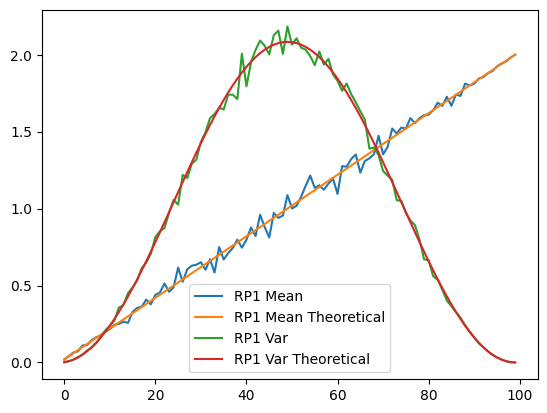

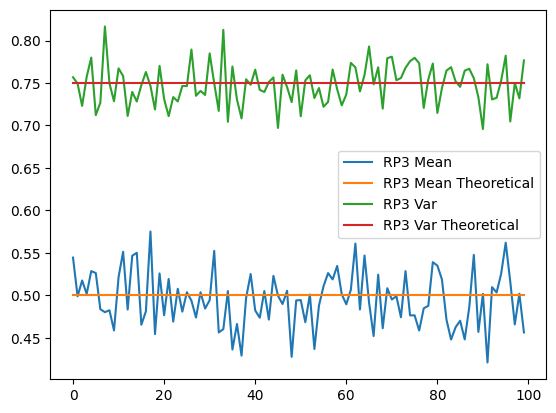

In [45]:
# b.1)

# If M is changed to a very large number, the mean and variance estimates has a lower variance. 

M=800
N=100

rp1_data = rp1(M, N)

rp1_mean = np.mean(rp1_data, axis=0)
rp1_var = np.var(rp1_data, axis=0)

rp1_mean_theoretical, rp1_var_theoretical = rp1_theoretical_stats(N)

plt.figure()
plt.plot(rp1_mean, label="RP1 Mean")
plt.plot(rp1_mean_theoretical, label="RP1 Mean Theoretical")
plt.plot(rp1_var, label="RP1 Var")
plt.plot(rp1_var_theoretical, label="RP1 Var Theoretical")
plt.legend()

# It can be seen that the mean and variance depends on time, hence the process is not WSS

# b.2)

rp3_data = rp3(M, N)

rp3_mean = np.mean(rp3_data, axis=0)
rp3_var = np.var(rp3_data, axis=0)

rp3_mean_theoretical, rp3_var_theoretical = rp3_theoretical_stats(N)

plt.figure()
plt.plot(rp3_mean, label="RP3 Mean")
plt.plot(rp3_mean_theoretical, label="RP3 Mean Theoretical")
plt.plot(rp3_var, label="RP3 Var")
plt.plot(rp3_var_theoretical, label="RP3 Var Theoretical")
plt.legend()

# It can be seen that the mean and variance does not depend on time, hence the process is WSS


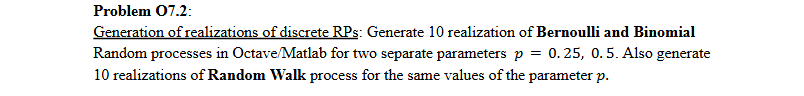


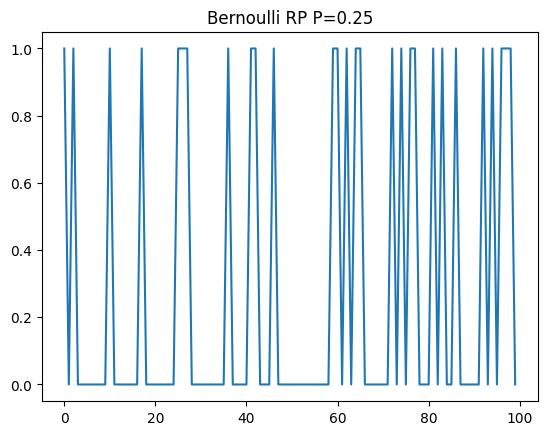

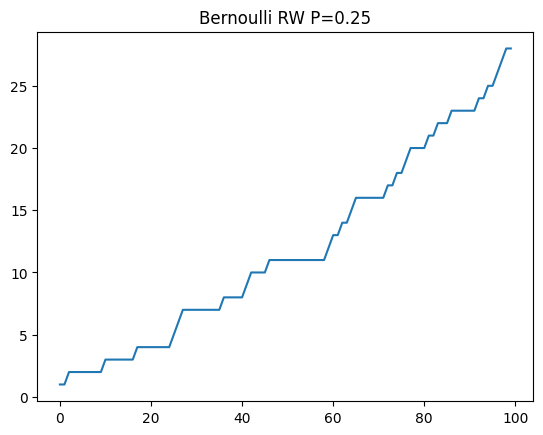

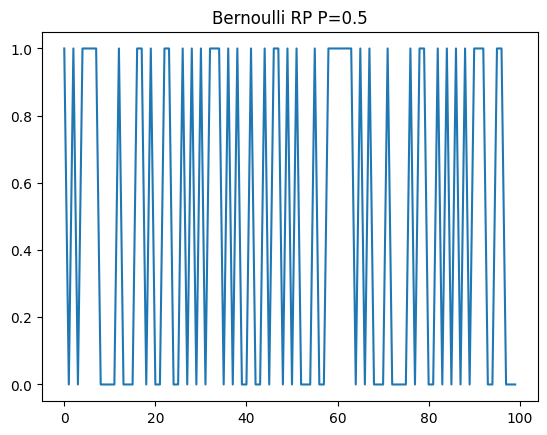

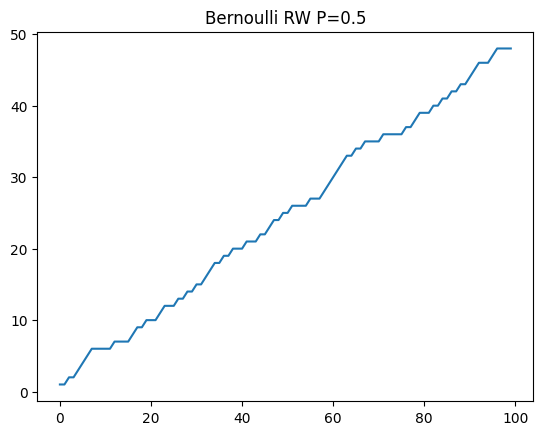

In [51]:
# Bernoulli Random Process

N = 100
ps = [0.25, 0.5]

for p in ps:
    bernoulli_samples = np.random.binomial(n=1, p=p, size=N)

    bernoulli_rw = np.cumsum(bernoulli_samples)
    
    plt.figure()
    plt.plot(bernoulli_samples)
    plt.title(f"Bernoulli RP P={p}")

    plt.figure()
    plt.plot(bernoulli_rw)
    plt.title(f"Bernoulli RW P={p}")

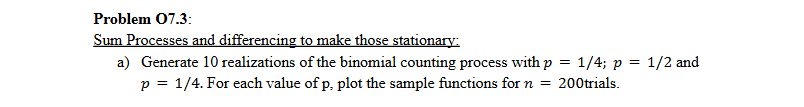
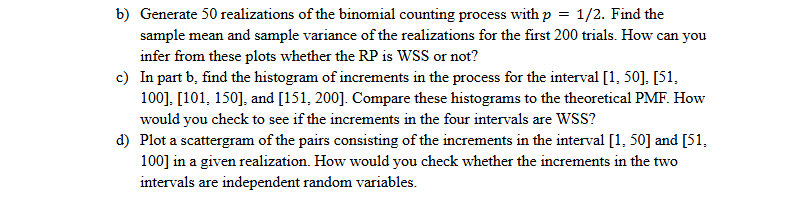

P=0.25, mean=24.015, var=211.704775
P=0.5, mean=48.655, var=926.735975


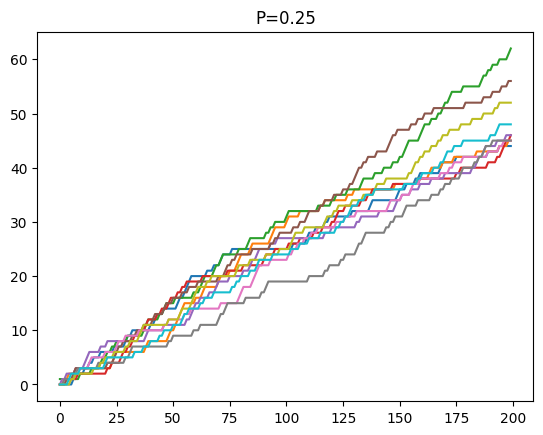

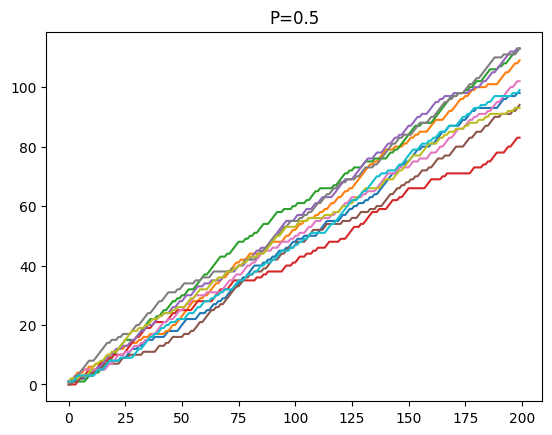

In [58]:
# a)

N = 200

ps = [1/4, 1/2]

for p in ps:

    plt.figure()
    for i in range(10):
    
        # The Bernoulli variable is a special case of the binomial with n=1
        samples = np.random.binomial(n=1, p=p, size=N)
    
        counting_process = np.cumsum(samples)
        
        
        plt.plot(counting_process)
        plt.title(f"P={p}")

    print(f"P={p}, mean={np.mean(counting_process)}, var={np.var(counting_process)}")

P=0.5, mean=49.0608, var=837.44110336


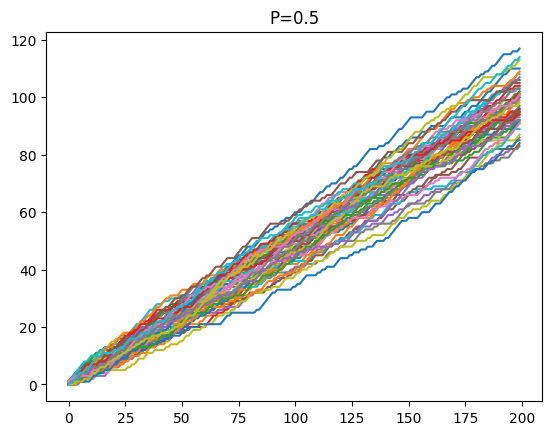

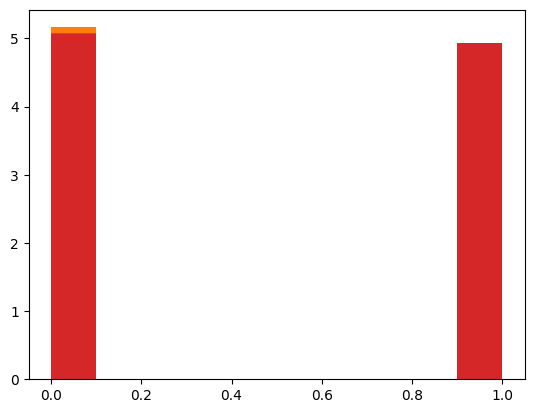

In [68]:
# b and c)

# b) From the plots it can be seen that mean changes and variance grows - The process is not WSS
# c) We can infer the that RP is WSS since the distribution is the same in each interval(Which implies stationarity) and stationarity implies WSS

N = 200

p=1/2

counting_process_ = []

plt.figure()
for i in range(50):

    # The Bernoulli variable is a special case of the binomial with n=1
    samples = np.random.binomial(n=1, p=p, size=N)

    counting_process = np.cumsum(samples)
    counting_process_ += [counting_process]
    
    plt.plot(counting_process)
    plt.title(f"P={p}")

counting_process = np.vstack(counting_process_)

plt.figure()
for n in range(4):

    start = n*5
    end = (n+1)*50
    plt.hist(np.diff(counting_process, axis=1)[:, start:end].flatten(), label=f"Samples {start}-{end}", density=True)
plt.legend

print(f"P={p}, mean={np.mean(counting_process)}, var={np.var(counting_process)}")

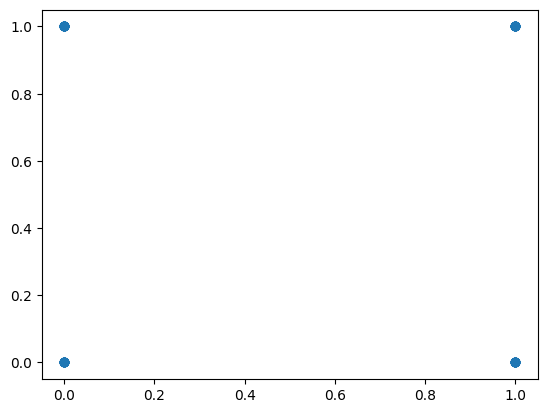

In [75]:
# d)

# THis exercise is non-sensical. But to show independence, the autocorrelation or autocovariance could be used.

plt.figure()
plt.scatter(np.diff(counting_process[0, 0:50]), np.diff(counting_process[0, 50:100]))


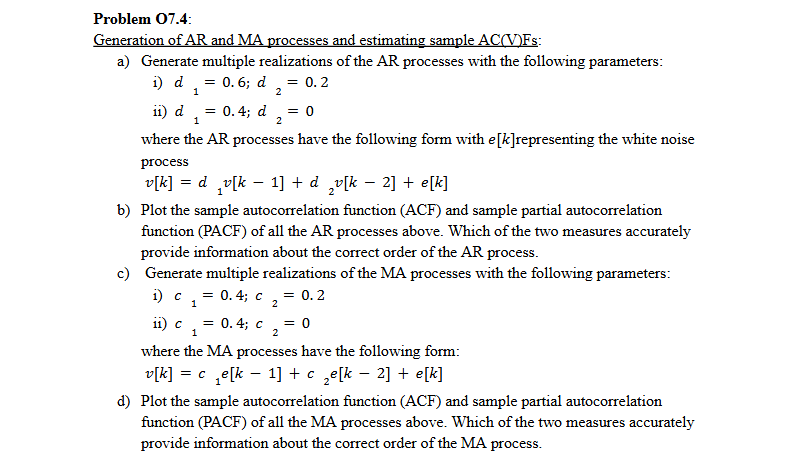

In [93]:
def ar(x, params):

    start = len(params)

    y = np.zeros_like(x)
    
    for i in range(start, len(x)):
        for n in range(len(params)):

            y[i] += params[n] * y[i-(n+1)]
        # Add innovation
        y[i] += x[i]
    
    return y   

def ma(x, params):

    start = len(params)

    y = np.zeros_like(x)
    
    for i in range(start, len(x)):
        for n in range(len(params)):

            y[i] += params[n] * x[i-(n+1)]
        # Add innovation
        y[i] += x[i]
    
    return y   

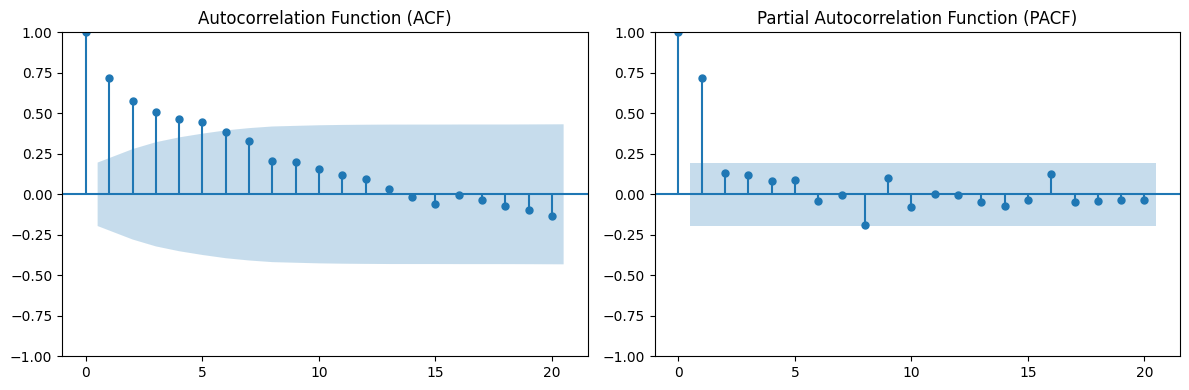

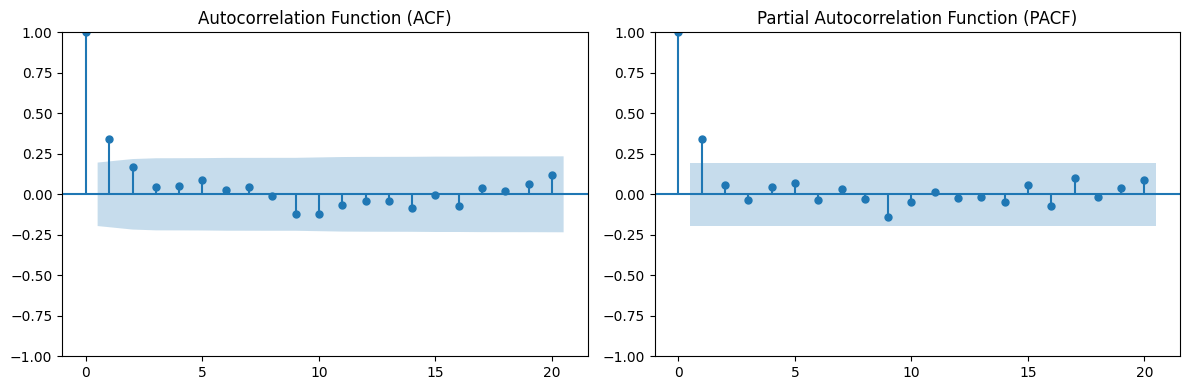

In [91]:
# a and b)

# The PACF provides information about the AR process with the AR order seen in the 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

params_ = [[0.6, 0.2], [0.4, 0]]

N = 100

for params in params_:
    
    x = np.random.normal(size=N)
    y = ar(x, params)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(y, ax=axes[0], lags=20)
    axes[0].set_title("Autocorrelation Function (ACF)")
    
    plot_pacf(y, ax=axes[1], lags=20, method='ywm')
    axes[1].set_title("Partial Autocorrelation Function (PACF)")
    #plt.title(params)
    plt.tight_layout()
    plt.show()

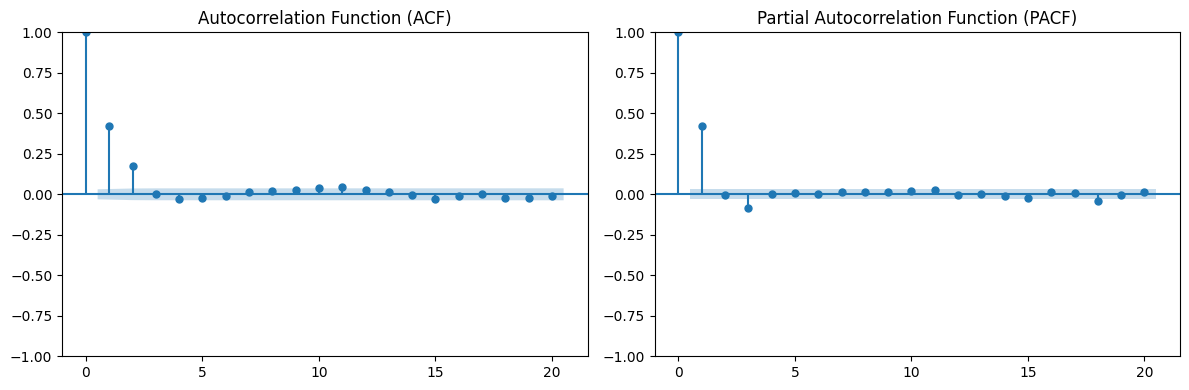

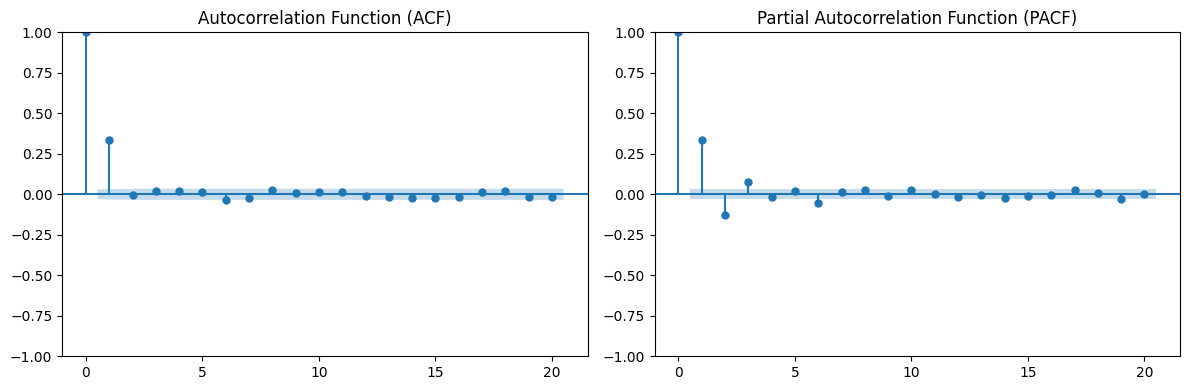

In [99]:
# c and d)

# The ACF provides information about the MA process with the MA order seen in the sharp cutoff of coeffecients


params_ = [[0.4, 0.2], [0.4, 0]]

N = 4000

for params in params_:
    
    x = np.random.normal(size=N)
    y = ma(x, params)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(y, ax=axes[0], lags=20)
    axes[0].set_title("Autocorrelation Function (ACF)")
    
    plot_pacf(y, ax=axes[1], lags=20, method='ywm')
    axes[1].set_title("Partial Autocorrelation Function (PACF)")
    #plt.title(params)
    plt.tight_layout()
    plt.show()

### 9.22


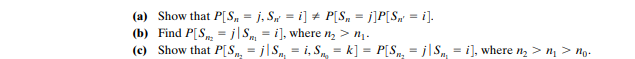

#### a)

The binomial counting process is defined as

$$
S_n =  \sum_{i=0}^n X_i
$$

Where $X_i$ is a Binnomial random variable

This implies that $S_{k} \geq S_{n}$ if $k \geq n$

We can prove the inequality by picking the following impossible event

$j=1$, $i=0$, $n=0$ and $k=1$

At time 0 we have one success and at time 1 we have 0 successes.
This violates $S_{n+1} \geq S_{n}$  
This gives us the probability $P[S_0 = 1, S_1 = 0] = 0$

We know that $P[S_0 = 1]=p$ and $P[S_1 = 0] = (1-p)^2$

Hence, we can see that $P[S_0 = 1, S_1 = 0] \neq P[S_0 = 1]P[S_1 = 0]$ for $p>0$

#### b)

